# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [26]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [27]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

In [31]:
# 1. What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?

# Distribution of target variable
print(fraud['fraud'].value_counts(normalize=True))


fraud
0.0    0.912597
1.0    0.087403
Name: proportion, dtype: float64


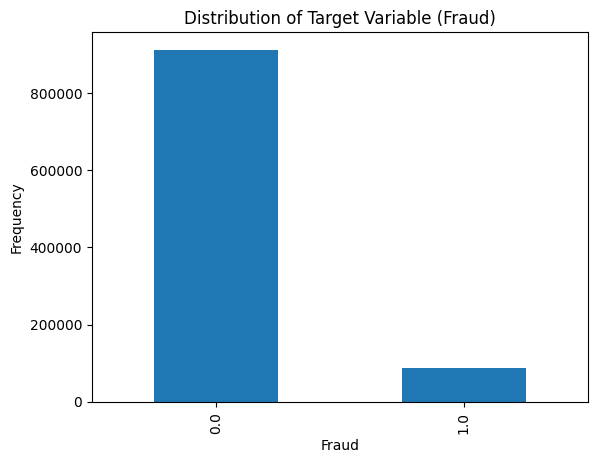

In [32]:
import matplotlib.pyplot as plt
# Visualization
fraud['fraud'].value_counts().plot(kind='bar')
plt.title('Distribution of Target Variable (Fraud)')
plt.xlabel('Fraud')
plt.ylabel('Frequency')
plt.show()

In [33]:
# 2. Train a LogisticRegression.

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Features and target
X = fraud.drop('fraud', axis=1)
y = fraud['fraud']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [34]:
#3. Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.

# Predictions and evaluation
y_pred = log_reg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    182557
         1.0       0.89      0.60      0.72     17443

    accuracy                           0.96    200000
   macro avg       0.93      0.80      0.85    200000
weighted avg       0.96      0.96      0.95    200000



In [35]:
#4. Run Oversample in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model?

from imblearn.over_sampling import RandomOverSampler

# Oversampling
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)

# Train and evaluate
log_reg.fit(X_res, y_res)
y_pred_res = log_reg.predict(X_test)
print("Oversampling Results")
print(classification_report(y_test, y_pred_res))

Oversampling Results
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96    182557
         1.0       0.58      0.95      0.72     17443

    accuracy                           0.93    200000
   macro avg       0.79      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000



In [36]:
# 5. Now, run Undersample in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?

from imblearn.under_sampling import RandomUnderSampler

# Undersampling
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)

# Train and evaluate
log_reg.fit(X_res, y_res)
y_pred_res = log_reg.predict(X_test)
print("Undersampling Results")
print(classification_report(y_test, y_pred_res))

Undersampling Results
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96    182557
         1.0       0.58      0.95      0.72     17443

    accuracy                           0.93    200000
   macro avg       0.79      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000



In [37]:
# 6. Finally, run SMOTE in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?

from imblearn.over_sampling import SMOTE

# SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

# Train and evaluate
log_reg.fit(X_res, y_res)
y_pred_res = log_reg.predict(X_test)
print("SMOTE Results")
print(classification_report(y_test, y_pred_res))

SMOTE Results
              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    182557
         1.0       0.58      0.95      0.72     17443

    accuracy                           0.94    200000
   macro avg       0.79      0.94      0.84    200000
weighted avg       0.96      0.94      0.94    200000

